### Fraudulent Transactions

Let's consider the following scenario:  Prediction of fraudulent transactions.

- Fraudulent tranactions = Positive / Success
- Legitimate transactions = Negative / Fail

**Model Performance**

Correct Predictions
- Fraudulent: **50**
- Legitimate: **900**

Incorrect Predictions
- Fraudulent: **40**
- Legitimate: **10**

<img src="https://snag.gy/fxND5e.jpg" style="width: 500px;">

### Classification Metrics
#### Accuracy
$$
\frac{\text{# correct}}{\text{TP + FP + FN + TN}} = \frac{TP+TN}{1000} = \frac{950}{1000} = .95
$$

#### Misclassification (Error) Rate
$$
1 - \text{Accuracy} = 1- \frac{950}{1000} = .05
$$

#### Sensitivity
> P = Total Positive observations

$$
\frac{TP}{P} = \frac{50}{TP + FN} = \frac{50}{50 + 10} = .83
$$

#### Specificity 
> N = Total Negative observations

$$
\frac{TN}{N} = \frac{900}{TN + FP} = \frac{900}{900 + 40} = .96
$$

### Sensitivity / Specificity Trade-Off

<img src="https://snag.gy/CE3ItG.jpg" style="width: 700px;">

The decision threashold for prediction is .5
- p > .5 = positive label
- p < .5 = negative label

In [90]:
import pandas as pd
from sklearn.linear_model import LogisticRegression


df = pd.read_csv("./titanic_clean.csv")

X = pd.get_dummies(df[["Pclass", "Age", "Sex", "Age", "SibSp", "Parch"]]).copy()
y = df['Survived']

logistic = LogisticRegression()
model    = logistic.fit(X, y)

### We will run a prediction and attach them back to our dataframe
preds = model.predict(X)
df['prediction'] = preds

In [91]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,prediction
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


### TP, FP, TN, FN labels
We will add these into our dataframe to get a sense about our confusion metrics on our actual DataFrame.

### What if we change the threashold for prediction?

- To .65 instead of .5?
- To .45 instead of .5?

Let's write a function to adjust our predicted labels based on these new threasholds.

In [100]:
def get_confusion_matrix(data):
    survived = data[0]
    predicted = data[1]

    if survived == 1 and predicted == 1:
        return 'True Positive'
        
    elif survived == 0 and predicted == 1:
        return 'False Positive'
    elif survived == 0 and predicted == 0:
        return 'True Negative'
    elif survived == 1 and predicted == 0:
        return 'False Negative'
            
    
        
    

# Apply function here
df['confusion_matrix'] = df[['Survived','prediction']].apply(get_confusion_matrix,axis=1)

In [102]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,prediction,confusion_matrix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,True Negative
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,True Positive
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,True Positive
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,True Positive
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,True Negative


In [107]:
print(df['confusion_matrix'].value_counts())

True Negative     365
True Positive     201
False Negative     87
False Positive     59
Name: confusion_matrix, dtype: int64


### AUC and ROC

We can use the idea of **sensitivity** and **specificity** in a combined metric we typically plot that represents both of these stats combined into one curved line, called The **Reciever Operator Characteristic**.

<img src="https://snag.gy/Oq23IS.jpg" style="width: 400px;">

We generate the ROC by plotting the sensitivity and specificity as we move our “classification threshold” from 0 to 1.  The ROC gives us a sense about the tradeoff between sensitivity and specificity.  Also, the closer the curve is the upper left, the better overall accuracy of our model is.  

The area under the curve is also refered to as **AUC**.  The acronym **AUC-ROC** refers to the “Area Under the Receiver Operating Characteristic curve.”

#### Sensitivity
> P = Total Positive observations

$$
\frac{TP}{P} = \frac{TP}{TP + FN} 
$$

#### Specificity 
> N = Total Negative observations

$$
\frac{TN}{N} = \frac{TN}{TN + FP} 
$$



### ROC-AUC Implementation

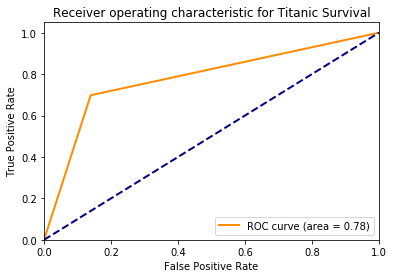

In [105]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate False positive rate and True positive rate
fpr, tpr, threshold = roc_curve(y, model.predict(X))
roc_auc = auc(fpr, tpr)
# Plot 

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Titanic Survival')
plt.legend(loc="lower right")
plt.show()

We generate one ROC curve per class. The ROC curve is generated by varying our threshold from 0 to 1. This doesn't actually change the threashold or our original perdictions but it does tell what our tradeoff between _sensitivity_ and _specificity_.

- Identify optimal threshold for our classfier.
- Also evaluate performance of our classifier.
- Potentially identify class balance problems.

### Balanced / Unbalanced Classes

In classification problems, methods generally work well when we have roughly equally-sized classes. (i.e. 50% in the positive class and 50% in the negative class for binary classification problems).

When we have a balanced class problem, usually we're talking about the case when we have a disproportionate balance of classes in a dataset.  An example would be a data where fraudulent transactions are very rare (ie: %2 fraudulent, %98 legit -- this is an extreme example).

- If $y = 1$ is a rare event (fraud), logistic regression will underestimate $y = 1$ and thus overestimate $y = 0$ (legit).

#### Methods for Dealing with Unbalanced Classes

- **Bias correction.**
Gary King wrote a [great whitepaper](https://gking.harvard.edu/files/gking/files/0s.pdf) on this topic.  This is a rigous approach and while provide good results, as data scientists we prefer "easier" methods.


- **Weighting observations.**
Some models allow the weighting of classes such as Naive Bayes, Random Forests, SVMs, etc.


- **Stratified cross-validation.**
If we use $k$-fold cross-validation entirely randomly, we may run into issues where some of our folds have no observations from the minority class.

<img src="https://snag.gy/PqISr3.jpg">

By stratifying on our output variable with unbalanced classes during cross- validation, we protect ourselves from this situation and ensure that our estimate of our model performance has lower variance.


- **Changing threshold for classification.**

By adjusting our classification threshold, we might find a better fit for our particular use-case.  We performed this operation earlier by manually changing our predicted labels by choosing a new threashold from the predicted probability.


- **Purposefully optimizing evaluation metrics.**

We might also consider optimizating our model for a specific metric such as precision, recall by class.  

#### Oversampling/undersampling.

- **Oversampling** : you duplicate the observations of the minority class to obtain a more balanced dataset.

- **Undersampling** : you drop observations of the majority class to obtain a balanced dataset, see below.

<img src="https://snag.gy/7QZSmJ.jpg" style="width: 500px">

**Recommendations**
- Unecessary if balance is worse than 25/75
- Target balance to 33/66 ratio.
- Model assumptions should also be considered to choose over or under sampling.
  - Number of variables may impact chosen model
- If your minority class contains enough observations for proper analysis, undersampling is prefered.
- **We should always evaluate on the real data.**

### Last piece of advice


#### Use one at a time
- Bias correction.
- Oversampling/undersampling.
- Weighting observations. (i.e. weighted least squares) ‣Stratified cross-validation.

#### Use what you are comfortable defending
- Changing threshold for classification.
- Purposefully optimizing evaluation metrics.